In [15]:
%cd /content/drive/MyDrive/coladUIT/python/Project_Python_For_AI/

/content/drive/MyDrive/coladUIT/python/Project_Python_For_AI


In [16]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 68.5 MB/s eta 0:00:00


In [17]:
%cd /content/drive/MyDrive/coladUIT/python/Project_Python_For_AI/src/

/content/drive/MyDrive/coladUIT/python/Project_Python_For_AI/src


In [18]:
import pandas as pd
import os
import sys

# Import the PreProcessor class
from pre_processor import PreProcessor

    # Import Gensim LDA
from gensim_lda import GensimLDA, run_lda_analysis

# Configuration
CONFIG = {
    "train_size": 100000
}

In [29]:
print("=== AMAZON REVIEWS DATA PROCESSING PIPELINE ===")
print(f"Configuration: {CONFIG}")

# Get the downloaded path from kagglehub
# If kritanjalijain_amazon_reviews_path is not defined, try to re-download or find the path
kritanjalijain_amazon_reviews_path = None
try:
    if kritanjalijain_amazon_reviews_path is None:
        raise NameError
except NameError:
    import kagglehub

    kritanjalijain_amazon_reviews_path = kagglehub.dataset_download(
        "kritanjalijain/amazon-reviews"
    )
    print(f"KaggleHub download path: {kritanjalijain_amazon_reviews_path}")

train_csv_path = os.path.join(kritanjalijain_amazon_reviews_path, "train.csv")

print("\n=== LOADING DATA ===")
try:
    train_df = pd.read_csv(train_csv_path)
    print(f"Successfully loaded data:")
    print(f"   - Train: {train_df.shape}")

except FileNotFoundError as e:
    print(f"Error: Dataset files not found!")
    print(f"   Expected paths: {train_csv_path}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading data: {e}")
    sys.exit(1)

# Rename columns
train_df.columns = ["label", "title", "text"]

# Data validation
print("\n=== DATA VALIDATION ===")
print(f"Train data info:")
print(f"   - Shape: {train_df.shape}")
print(f"   - Null values: {train_df.isnull().sum().sum()}")
print(f"   - Label distribution: {train_df['label'].value_counts().to_dict()}")

# Create copies of the limited dataframes using configuration
train_df = train_df.iloc[: CONFIG["train_size"]].copy()
print(f"\nLimited datasets to train: {len(train_df)}")

# Combine title and text columns into input column
train_df.loc[:, "input"] = train_df["title"] + " " + train_df["text"]

# Drop original title and text columns
train_df = train_df.drop(["title", "text"], axis=1)

=== AMAZON REVIEWS DATA PROCESSING PIPELINE ===
Configuration: {'train_size': 100000}
KaggleHub download path: /kaggle/input/amazon-reviews

=== LOADING DATA ===
Successfully loaded data:
   - Train: (3599999, 3)

=== DATA VALIDATION ===
Train data info:
   - Shape: (3599999, 3)
   - Null values: 207
   - Label distribution: {1: 1800000, 2: 1799999}

Limited datasets to train: 100000


In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
preprocessor = PreProcessor()
gensimLDA = GensimLDA()

print("\n=== TEXT PREPROCESSING ===")
# Process training data using efficient pipeline method
print("Processing training data...")
train_df = preprocessor.clean_data(train_df.copy())
train_df = preprocessor.remove_duplicates(train_df)

# Use efficient pipeline method that combines cleaning, tokenization, stopword removal and normalization
train_df = train_df.assign(
    lda_input=train_df["input"].apply(gensimLDA.preprocess_for_lda)
)

# Data quality check after preprocessing
print("\n=== POST-PREPROCESSING VALIDATION ===")
train_empty = (
    train_df["lda_input"]
    .apply(lambda x: len(x) if isinstance(x, list) else 0)
    .eq(0)
    .sum()
)

print(f"Training data quality:")
print(f"   - Final shape: {train_df.shape}")
print(f"   - Empty lda_input: {train_empty}")
print(
    f"   - Average tokens per document: {train_df['lda_input'].apply(len).mean():.2f}"
)

# Display sample results
print(f"\nFinal columns: {list(train_df.columns)}")
print("\nSample processed data:")
print(train_df.head(3))
print("\n" + "=" * 50)

# Final summary
print(f"\n" + "=" * 60)
print(f"PIPELINE COMPLETION SUMMARY")
print(f"=" * 60)
print(f"Dataset Information:")
print(f"   - Train samples: {len(train_df):,}")

print(f"\nLabel Distribution:")
train_labels = train_df["label"].value_counts()
print(f"   Train: {dict(train_labels)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



=== TEXT PREPROCESSING ===
Processing training data...
Number of null values before processing:
label    0
input    5
dtype: int64

Number of null values after processing:
label    0
input    0
dtype: int64

Data types of columns:
label     int64
input    object
dtype: object
Number of records before removing duplicates: 100000
Number of records after removing duplicates: 99997

=== POST-PREPROCESSING VALIDATION ===
Training data quality:
   - Final shape: (99997, 3)
   - Empty lda_input: 2
   - Average tokens per document: 39.99

Final columns: ['label', 'input', 'lda_input']

Sample processed data:
   label                                              input  \
0      2  The best soundtrack ever to anything. I'm read...   
1      2  Amazing! This soundtrack is my favorite music ...   
2      2  Excellent Soundtrack I truly like this soundtr...   

                                           lda_input  
0  [best, soundtrack, ever, anything, reading, lo...  
1  [amazing, soundtrack, fav


=== GENSIM LDA TOPIC MODELING ===
GENSIM LDA TOPIC MODELING
Preprocessing 99997 documents for LDA...
Documents after preprocessing: 99995
Average tokens per document: 39.99

Detecting bigrams and trigrams...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample bigrams found: ['price_tag', 'every_penny', 'every_single', 'without_doubt', 'buyer_beware']

Creating dictionary and corpus...
Dictionary size before filtering: 168330
Dictionary size after filtering: 10000
Corpus size: 99995 documents

Finding optimal number of topics...

=== FINDING OPTIMAL TOPICS (10-20) ===

Testing 10 topics...
  Coherence: 0.5463, Perplexity: -7.6744

Testing 11 topics...
  Coherence: 0.5584, Perplexity: -7.9276

Testing 12 topics...
  Coherence: 0.5319, Perplexity: -8.1773

Testing 13 topics...
  Coherence: 0.5417, Perplexity: -8.3309

Testing 14 topics...
  Coherence: 0.5249, Perplexity: -8.4453

Testing 15 topics...
  Coherence: 0.4759, Perplexity: -8.5080

Testing 16 topics...
  Coherence: 0.5261, Perplexity: -8.5658

Testing 17 topics...
  Coherence: 0.5103, Perplexity: -8.6361

Testing 18 topics...
  Coherence: 0.5111, Perplexity: -8.6837

Testing 19 topics...
  Coherence: 0.4665, Perplexity: -8.7464

Testing 20 topics...
  Coherence: 0.4618, Perple

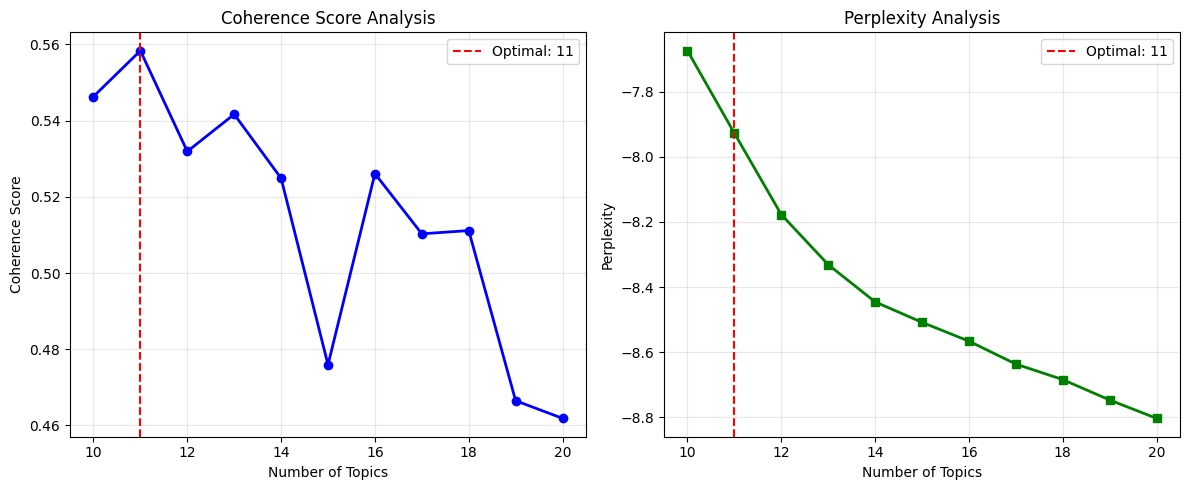


Calculating metrics...
Coherence Score: 0.5584
Perplexity: -7.9276

=== DISCOVERED TOPICS ===

Topic 0:
  story (0.051), character (0.031), life (0.030), novel (0.018), child (0.014), world (0.014), reader (0.012), man (0.011), woman (0.010), family (0.010)

Topic 1:
  dog (0.028), water (0.024), hot (0.019), hair (0.016), taste (0.016), grip (0.014), concert (0.014), smell (0.011), air (0.009), heat (0.009)

Topic 2:
  use (0.026), nice (0.023), easy (0.018), small (0.016), case (0.014), look (0.013), fit (0.013), camera (0.012), well (0.012), side (0.010)

Topic 3:
  great (0.075), one (0.046), love (0.043), best (0.034), ever (0.018), every (0.014), must (0.014), classic (0.012), year (0.012), still (0.011)

Topic 4:
  book (0.055), good (0.025), like (0.024), read (0.021), one (0.015), would (0.014), get (0.014), really (0.014), time (0.012), dont (0.012)

Topic 5:
  game (0.060), play (0.051), player (0.023), computer (0.017), drive (0.015), system (0.013), card (0.013), kelly (0

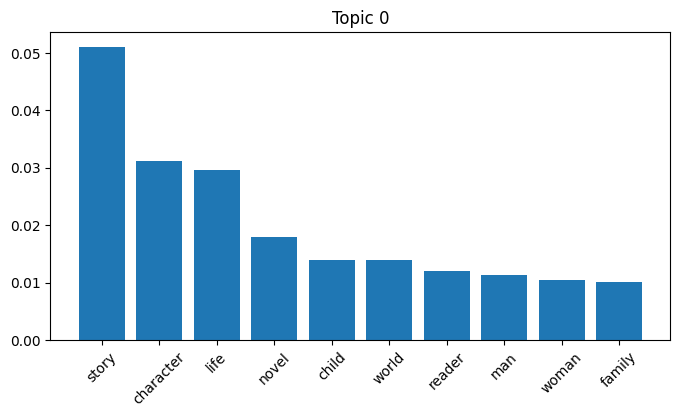

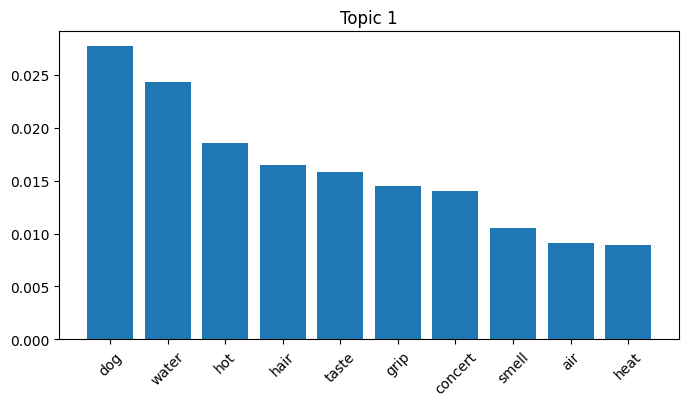

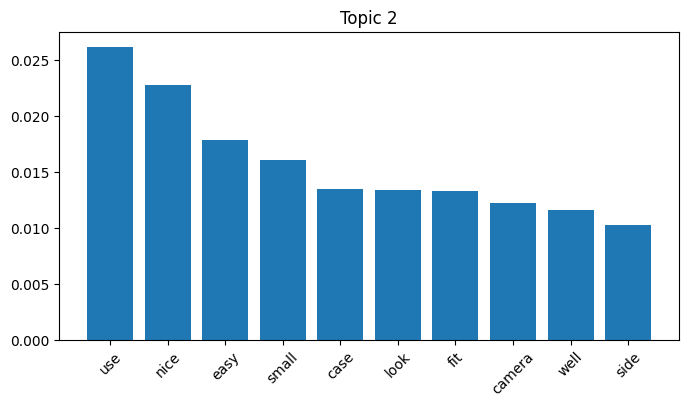

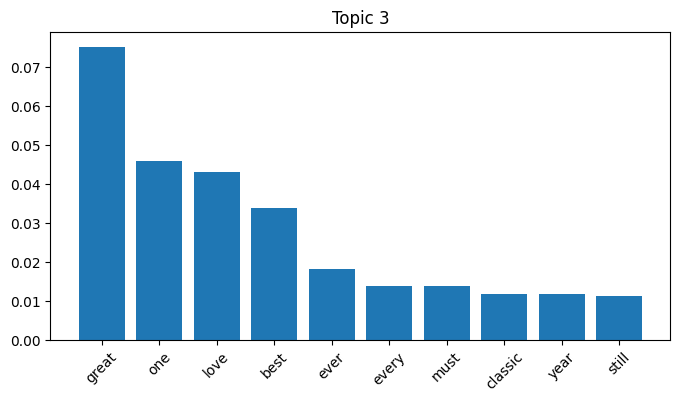

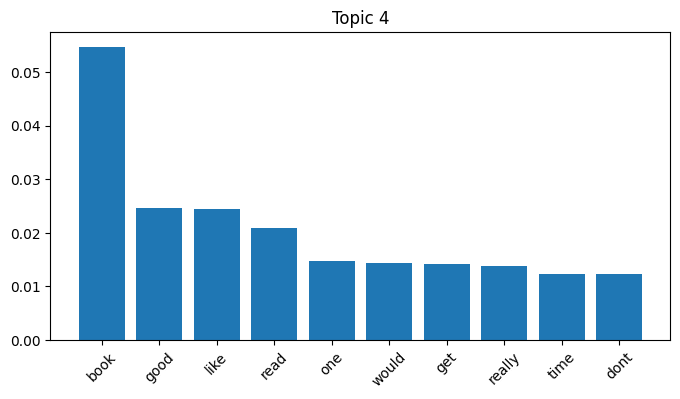

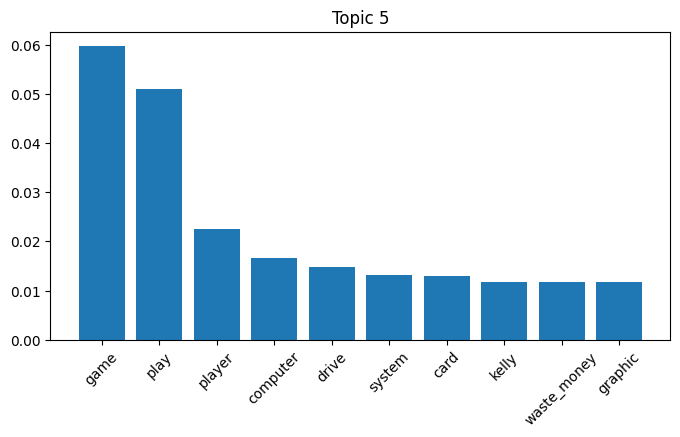

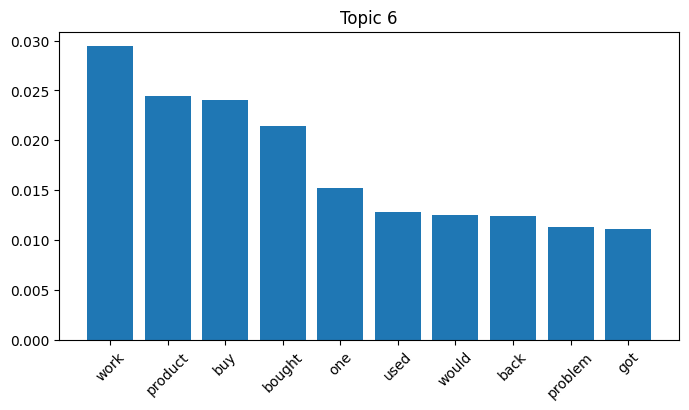

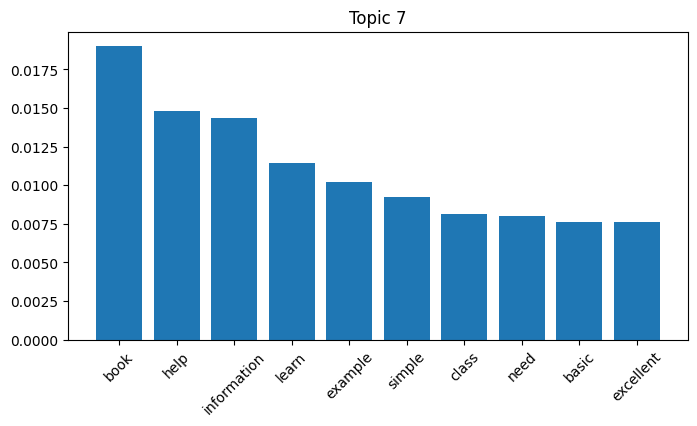

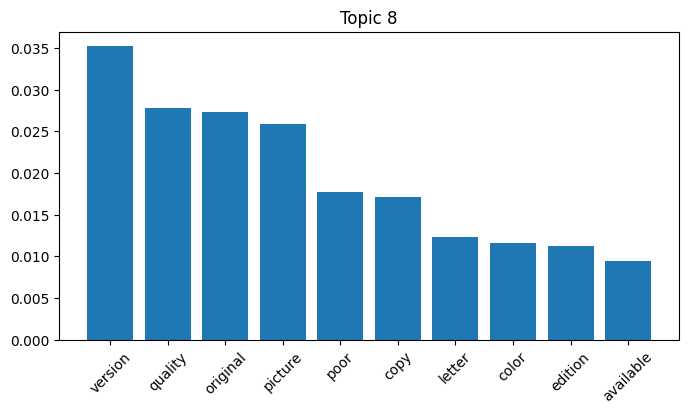

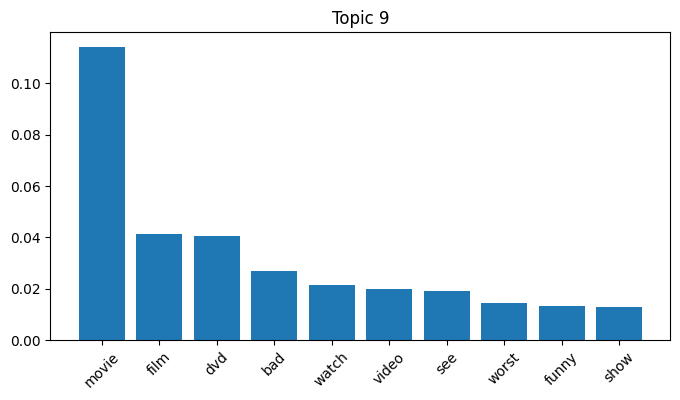

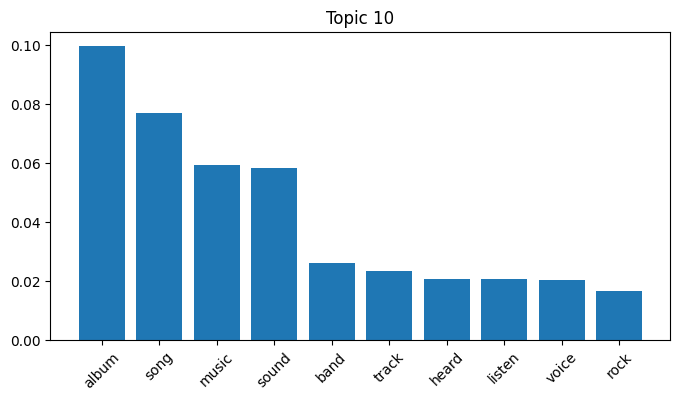

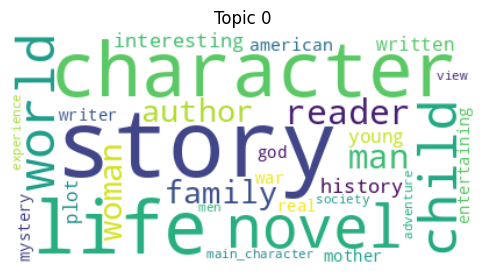

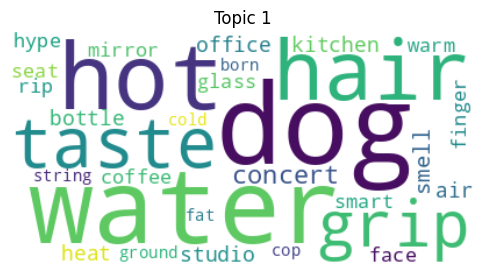

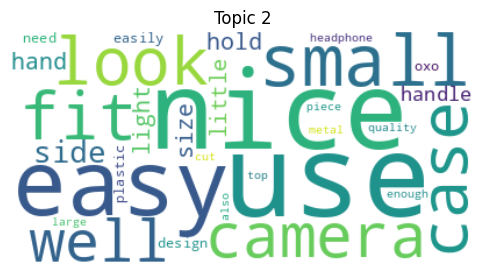

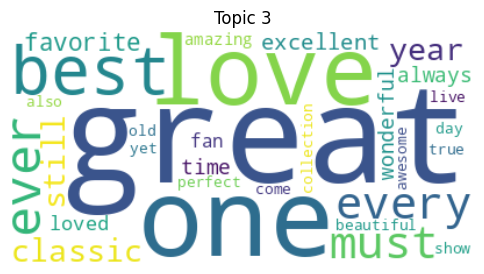

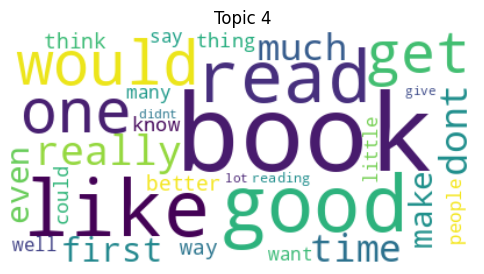

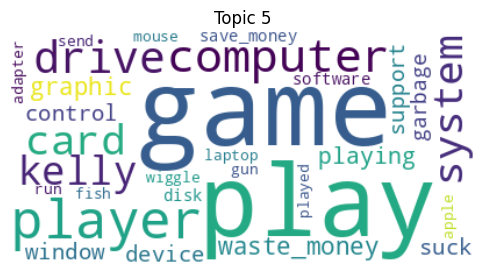

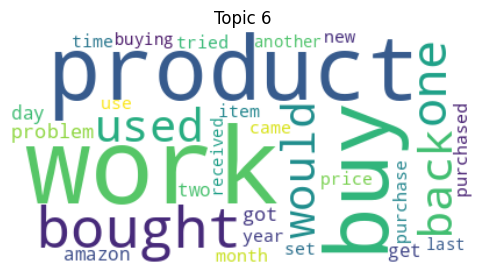

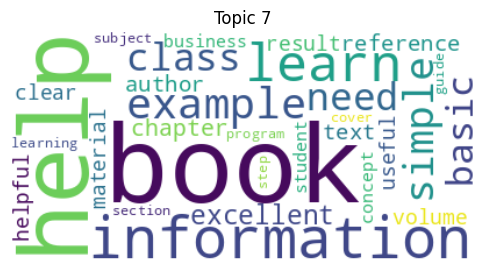

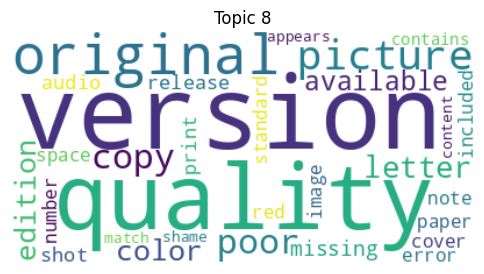

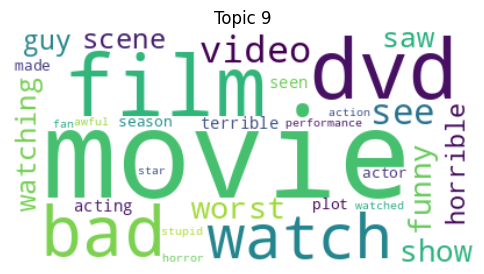

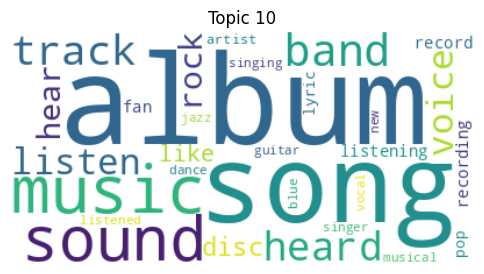


FINAL METRICS
Number of Topics: 11
Coherence Score: 0.5584
Perplexity: -7.9276

LDA Topic Modeling Results:
Training:
   - Number of topics: 11
   - Coherence Score: 0.5584
   - Perplexity: -7.9276
   - Dictionary size: 10000
   - Corpus size: 99995


In [31]:
# Run LDA Topic Modeling
print("\n" + "="*60)
print("=== GENSIM LDA TOPIC MODELING ===")
print("="*60)

# Analyze với train_size samples
lda, lda_metrics = run_lda_analysis(train_df=train_df,sample_size=CONFIG["train_size"], find_optimal=True)

# In kết quả
print(f"\nLDA Topic Modeling Results:")
print("="*60)
print(f"Training:")
print(f"   - Number of topics: {lda_metrics['num_topics']}")
print(f"   - Coherence Score: {lda_metrics['coherence_score']:.4f}")
print(f"   - Perplexity: {lda_metrics['perplexity']:.4f}")
print(f"   - Dictionary size: {lda_metrics['dictionary_size']}")
print(f"   - Corpus size: {lda_metrics['corpus_size']}")
print(f"="*60)